<a href="https://colab.research.google.com/github/schauppi/Udemy_Tensorflow/blob/schauppi/Recurrent_Neural_Networks_Time_Series_and_Sequence_Data/Simple_RNN_SIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#Shape - N x T x D
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [138]:
print(tf.__version__)

2.4.1


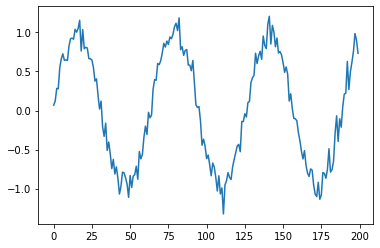

In [139]:
#Create Data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)

In [140]:
T = 10 # 10 previous time steps to predict the next time step
D = 1 # 1 numeric feature
X = []# Using fixed size numpy arrays would probably be better
Y = []

for t in range(len(series) - T):
  x = series[t:T+t]
  X.append(x)
  y = series[t+T]
  Y.append(y)

print(len(X))
print(len(Y))

190
190


In [141]:
#convert to arrays
X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(190, 10)
(190,)


In [142]:
#Reshape Array
#N x T x D
X = X.reshape(-1, T, D)
print(X.shape)

N = len(X)
print(N)

(190, 10, 1)
190


In [143]:
#Split train and test set 
x_train = X[:N//2]
x_test = X[N//2:]
y_train = Y[:N//2]
y_test = Y[N//2:]

In [144]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(95, 10, 1)
(95,)
(95, 10, 1)
(95,)


In [145]:
#build the model 
i = keras.layers.Input(shape=(T, D))
x = keras.layers.SimpleRNN(32, activation="relu")(i)
x = keras.layers.Dense(1)(x)

model = keras.models.Model(i, x)

model.compile(optimizer="Adam", loss="mse")

In [146]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [147]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100) 

Epoch 1/100
3/3 [==============================] - 1s 104ms/step - loss: 0.6201 - val_loss: 0.4872
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.5115 - val_loss: 0.4181
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4602 - val_loss: 0.3511
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.3884 - val_loss: 0.2852
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3352 - val_loss: 0.2273
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.2674 - val_loss: 0.1872
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2168 - val_loss: 0.1693
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1931 - val_loss: 0.1454
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1524 - val_loss: 0.1129
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1375 - val_loss: 0.0869
Epoch 11/100
3/3 [

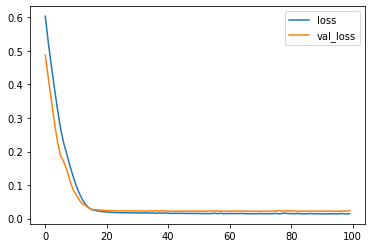

In [148]:
#plot the loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.legend()

In [149]:
#multi step forecast

predictions_test = []

#last train input
x_last = X[N//2]

In [150]:
while (len(predictions_test) < len(y_test[-N//2:])):
  #reshape array and select first index in array
  pred = model.predict(x_last.reshape(1, -1, 1))[0, 0]

  predictions_test.append(pred)

  #shift last element to the left 
  x_last = np.roll(x_last, -1)
  #new input
  x_last[-1] = pred

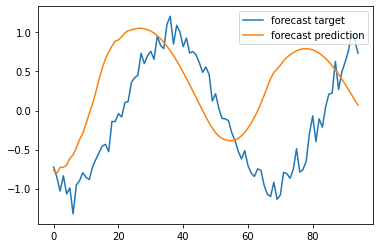

In [151]:
plt.plot(y_test, label="forecast target")
plt.plot(predictions_test, label="forecast prediction")
plt.legend()